<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JulyLeetCodePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

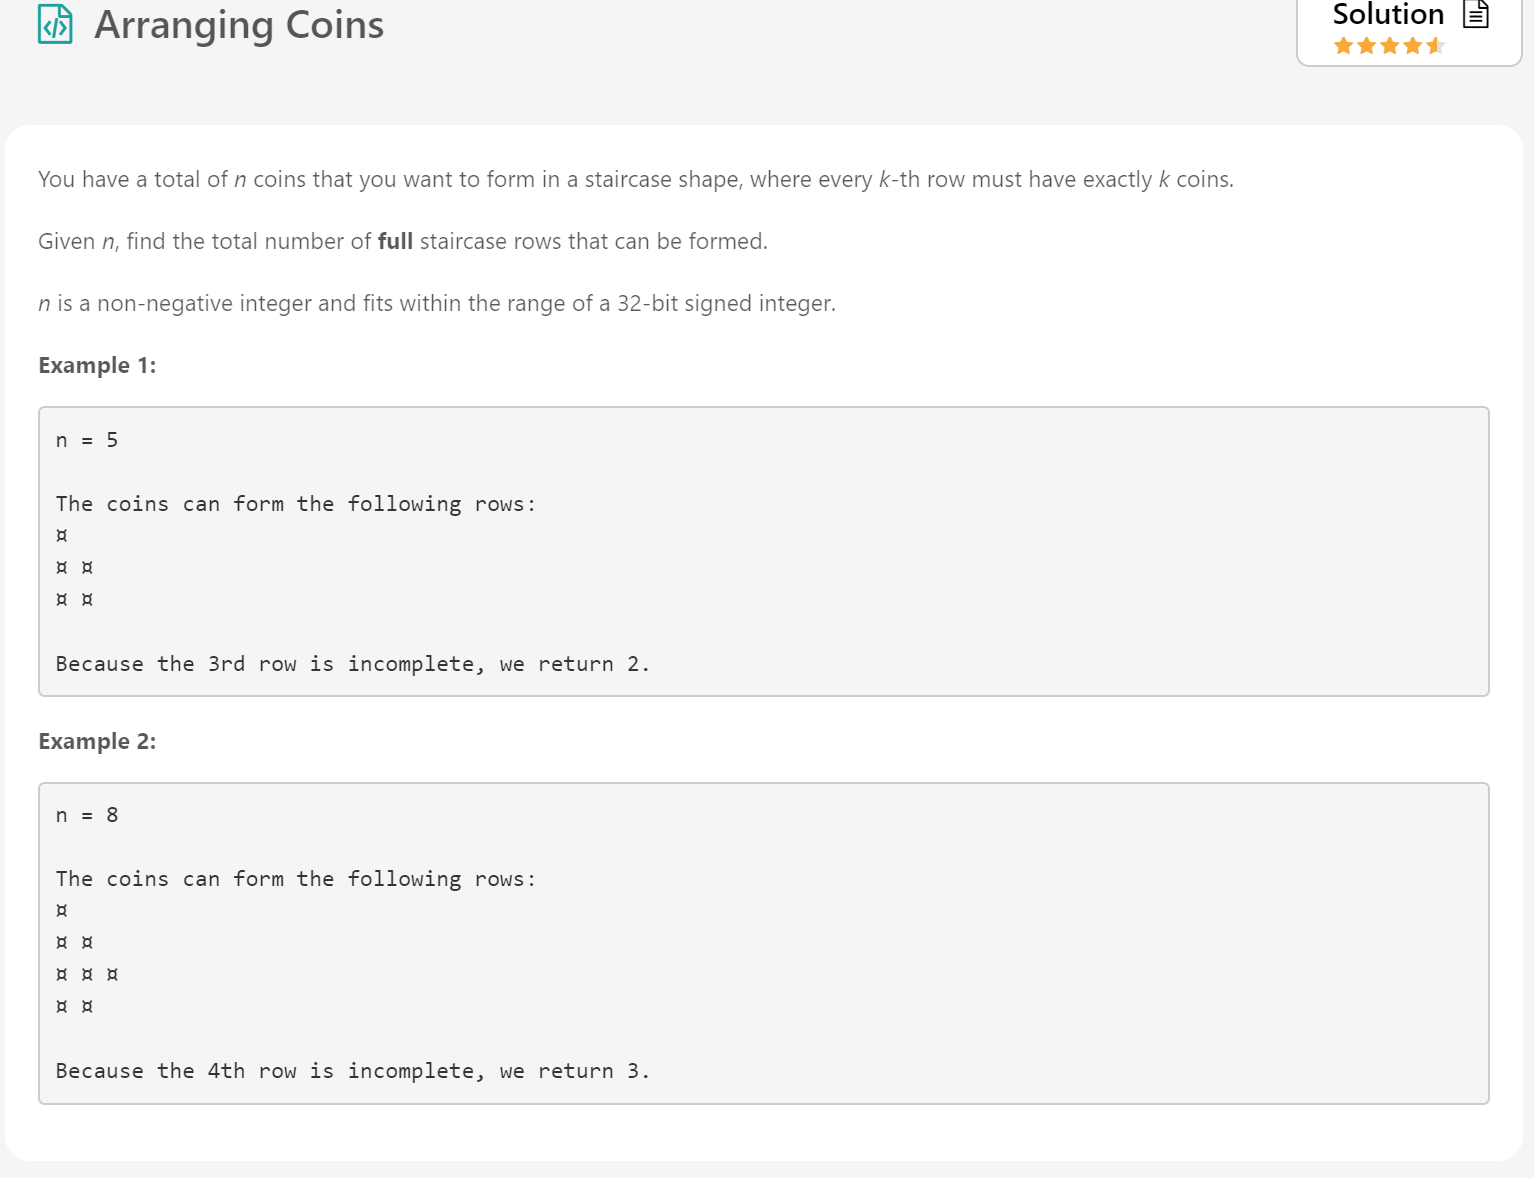

In [ ]:
''' July 1st Arranging coins
Should have used binary search appoarch 
'''
# solution : https://leetcode.com/articles/arranging-coins/

# quite dump solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        total = n
        for i in range(0,n+1):
            total = total - i
            if total < 0:
                return i-1
            
        return 0 if n==0 else 1 

# fastest solution
class Solution:
    def arrangeCoins(self, n: int) -> int:
        l, r = 1, 65536
        while l < r:
            mid = (l + r) >> 1
            if mid * (mid + 1) // 2 <= n:
                l = mid + 1
            else:
                r = mid
        return l - 1


# 1 line solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        return int((-1 + sqrt(1 + 8*n)) // 2)


# 1 line solution 
class Solution:
    def arrangeCoins(self, n: int) -> int:
        return floor((-1+sqrt(1+8*n))/2)
  


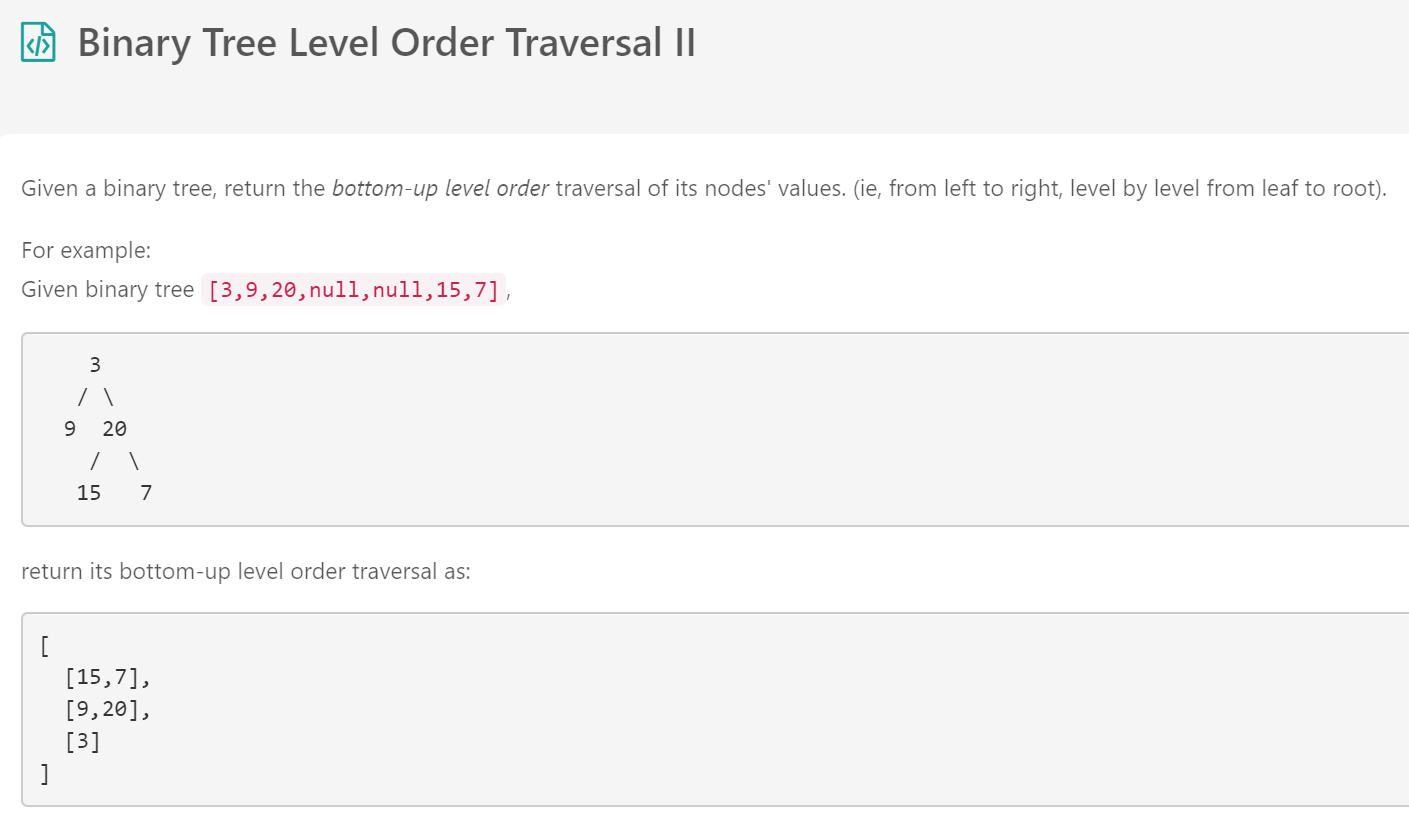

In [ ]:
''' July 2nd my solution using bfs
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        dic = {}
        layer = 0
        
        def bfs(node : TreeNode, layer :int):
            if not node:
                return
            if layer in dic:
                dic[layer] += [node.val]
            else:
                dic[layer] = [node.val]
                
            if node.left:
                bfs(node.left,layer + 1)
            if node.right:
                bfs(node.right,layer + 1)
                
        bfs(root,layer)
        
        return reversed(list(dic.values()))

### fastest solution , same idea

class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        levels = [] # len of leves is the same as layer number
        if not root:
            return levels
        
        def helper(node,level):
            
            if len(levels)==level: 
                levels.append([]) # append new layer
            
            levels[level].append(node.val) # layer append new values
            
            if node.left: helper(node.left, level+1)
            if node.right: helper(node.right, level+1)
        
        helper(root,0)
        return levels[::-1]  # reversed list


### 2nd fastest solution using while loop , Stack
class Solution:
    def levelOrderBottom(self, root: TreeNode) -> List[List[int]]:
        res = []
        queue = []
        
        queue.append(root)
        
        while queue:
            level = []
            size = len(queue)
            
            #node = queue.pop(0)
            #print(queue)
            for _ in range(size):    
                node = queue.pop(0)
                if node is not None:
                    level.append(node.val)
                    queue.append(node.left)
                    queue.append(node.right)
            if level != []:
                res.insert(0, level)
                
            
        return res

In [ ]:
# Summary 3 approaches
# 1. dfs recursively
def levelOrderBottom1(self, root):
    res = []
    self.dfs(root, 0, res)
    return res

def dfs(self, root, level, res):
    if root:
        if len(res) < level + 1:
            res.insert(0, [])
        res[-(level+1)].append(root.val)
        self.dfs(root.left, level+1, res)
        self.dfs(root.right, level+1, res)
        
# 2. dfs + stack
def levelOrderBottom2(self, root):
    stack = [(root, 0)]
    res = []
    while stack:
        node, level = stack.pop()
        if node:
            if len(res) < level+1:
                res.insert(0, [])
            res[-(level+1)].append(node.val)
            stack.append((node.right, level+1))
            stack.append((node.left, level+1))
    return res
 
# 3. bfs + queue   
def levelOrderBottom(self, root):
    queue, res = collections.deque([(root, 0)]), []
    while queue:
        node, level = queue.popleft()
        if node:
            if len(res) < level+1:
                res.insert(0, [])
            res[-(level+1)].append(node.val)
            queue.append((node.left, level+1))
            queue.append((node.right, level+1))
    return res

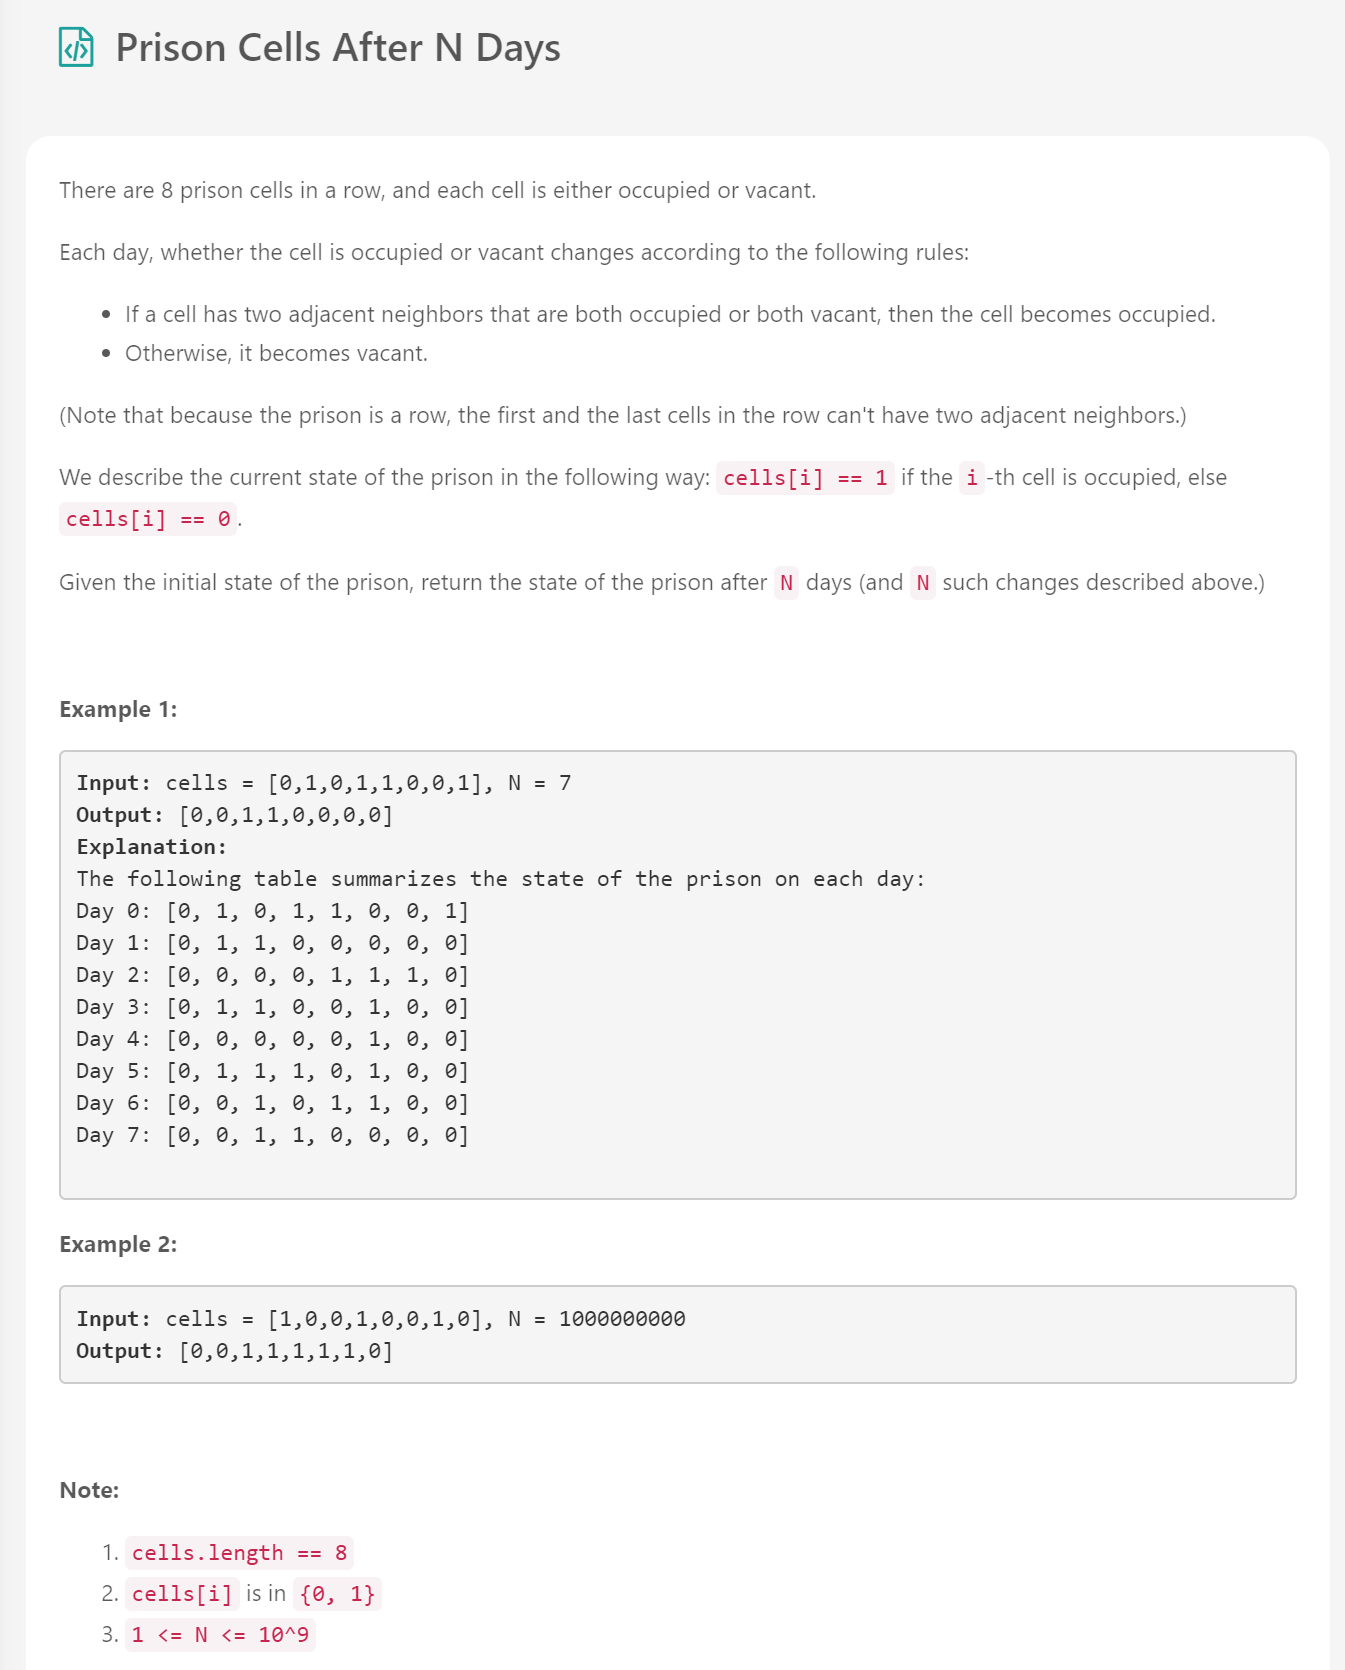

In [ ]:
'''July 3rd Prison Cells After N Days
There are 8 prison cells in a row, and each cell is either occupied or vacant.
Each day, whether the cell is occupied or vacant changes according to the following rules:

If a cell has two adjacent neighbors that are both occupied or both vacant, then the cell becomes occupied.
Otherwise, it becomes vacant.
(Note that because the prison is a row, the first and the last cells in the row can't have two adjacent neighbors.)

We describe the current state of the prison in the following way: cells[i] == 1 if the i-th cell is occupied, else cells[i] == 0.
Given the initial state of the prison, return the state of the prison after N days (and N such changes described above.)

Ex1
Input: cells = [0,1,0,1,1,0,0,1], N = 7
Output: [0,0,1,1,0,0,0,0]
Explanation: 
The following table summarizes the state of the prison on each day:
Day 0: [0, 1, 0, 1, 1, 0, 0, 1]
Day 1: [0, 1, 1, 0, 0, 0, 0, 0]
Day 2: [0, 0, 0, 0, 1, 1, 1, 0]
Day 3: [0, 1, 1, 0, 0, 1, 0, 0]
Day 4: [0, 0, 0, 0, 0, 1, 0, 0]
Day 5: [0, 1, 1, 1, 0, 1, 0, 0]
Day 6: [0, 0, 1, 0, 1, 1, 0, 0]
Day 7: [0, 0, 1, 1, 0, 0, 0, 0]


Ex2:
Input: cells = [1,0,0,1,0,0,1,0], N = 1000000000
Output: [0,0,1,1,1,1,1,0]
'''

### Time limit exceeded for the example 2. 
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        
        for i in range(N):
            dummy = [0 for x in range(len(cells))]
            for j in range(len(cells)):
                if j == 0 or j == len(cells)-1:
                    dummy[j] = 0
                else:
                    if cells[j-1] == cells[j+1]:
                        dummy[j]= 1
                    else:
                        dummy[j]= 0
            cells = dummy
   
        return cells

### still time limit exceed
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        
        for i in range(N):
            cells = [0]  + [ 1 if a == b else 0 for a,b in zip(cells[:-2],cells[2:])] +  [0]
            

        return cells   


In [ ]:
# https://leetcode.com/problems/prison-cells-after-n-days/
# There are 8 prison cells in a row, and each cell is either occupied or vacant.
# Each day, whether the cell is occupied or vacant
# changes according to the following rules:
# If a cell has two adjacent neighbors that are both occupied
# or both vacant, then the cell becomes occupied.
# Otherwise, it becomes vacant.
# Note that because the prison is a row, the first and the
# last cells in the row can't have two adjacent neighbors.
# We describe the current state of the prison in the following
# way: cells[i] == 1 if the i-th cell is occupied,
# else cells[i] == 0.
# Given the initial state of the prison, return the state
# of the prison after N days and N such changes.

# For 8 cells, the ends are vacant after the first day
# so there are at most 2**6 = 64 possible states.
# After at most 64 days there will be a cycle in the pattern
# of cells. Evolve the cells until a repeated state is
# found. Subtract as many cycles as possible from the
# remaining days, then evolve to the final state.
# Time - O(1)
# Space - O(1)

class Solution(object):
def prisonAfterNDays(self, cells, N):
    """
    :type cells: List[int]
    :type N: int
    :rtype: List[int]
    """
    day = 0
    state = tuple(cells) # state can be a dict key
    state_to_day = {}

    def next_state(state):
      return tuple([0] + [int(not (state[i - 1] ^ state[i + 1])) for i in range(1, 7)] + [0])

    while day < N and state not in state_to_day: # until cycle in states
      state_to_day[state] = day
      day += 1
      state = next_state(state)

    if day < N:
      cycle = day - state_to_day[state]
      remaining = (N - state_to_day[state]) % cycle
      for _ in range(remaining):
        state = next_state(state)

    return list(state)

### fastest soluton 
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        if not N:
            return cells
        
        while N:
            state = cells.copy()
            for i in range(len(cells)):
                if i == 0 or i == len(state) - 1:
                    cells[i] = 0
                else:
                    if state[i-1] == state[i+1]:
                        cells[i] = 1
                    else:
                        cells[i] = 0
            N = (N-1) % 14
        return cells
    
        '''
        first = True
        while(N):
            tempList = [0]*8
            if first:
                tempList[7] = 0
                tempList[0] = 0
                first = False
            for i in range(1,7):
                if (cells[i-1] and cells[i+1]) or (not (cells[i-1] or cells[i+1])):
                    tempList[i] = 1

            cells = tempList
            N -= 1
        
        return cells
        '''
### 2nd fastest

class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        #pre = cells
       
        def findNext(pre):
            curr = [0] * len(cells)
            curr[0] = 0
            for j in range(1, len(cells)-1):
                #print(pre[j-1], pre[j+1])
                if pre[j-1] != pre[j+1]:
                    curr[j] = 0
                else:
                    curr[j] = 1
            curr[len(cells)-1] = 0
            return curr
       
        cycle = []
        state = findNext(cells)
        while state not in cycle:
            cycle.append(state)
            state = findNext(state)
           
        return cycle[(N - 1)%len(cycle)]            

# Discussion link: https://leetcode.com/explore/featured/card/july-leetcoding-challenge/544/week-1-july-1st-july-7th/3379/discuss/205684/JavaPython-Find-the-Loop-or-Mod-14

There must be a pattern in this problem. The length of the list is 8, and the first and last element of list will always be 0. So only 8-2= 6 items in the list will change. For each item, there are 2 possible values : 0 or 1. So the entile possible cell states will be less or equal to` 2**6 = 64.`

```
0 [0, 1, 0, 1, 1, 0, 0, 1]
----------------------------------------
1 [0, 1, 1, 0, 0, 0, 0, 0]
2 [0, 0, 0, 0, 1, 1, 1, 0]
3 [0, 1, 1, 0, 0, 1, 0, 0]
4 [0, 0, 0, 0, 0, 1, 0, 0]
5 [0, 1, 1, 1, 0, 1, 0, 0]
6 [0, 0, 1, 0, 1, 1, 0, 0]
7 [0, 0, 1, 1, 0, 0, 0, 0]
8 [0, 0, 0, 0, 0, 1, 1, 0]
9 [0, 1, 1, 1, 0, 0, 0, 0]
10 [0, 0, 1, 0, 0, 1, 1, 0]
11 [0, 0, 1, 0, 0, 0, 0, 0]
12 [0, 0, 1, 0, 1, 1, 1, 0]
13 [0, 0, 1, 1, 0, 1, 0, 0]
14 [0, 0, 0, 0, 1, 1, 0, 0]
----------------------------------------
15 [0, 1, 1, 0, 0, 0, 0, 0]
16 [0, 0, 0, 0, 1, 1, 1, 0]
17 [0, 1, 1, 0, 0, 1, 0, 0]
18 [0, 0, 0, 0, 0, 1, 0, 0]
19 [0, 1, 1, 1, 0, 1, 0, 0]
20 [0, 0, 1, 0, 1, 1, 0, 0]
21 [0, 0, 1, 1, 0, 0, 0, 0]
22 [0, 0, 0, 0, 0, 1, 1, 0]
23 [0, 1, 1, 1, 0, 0, 0, 0]
24 [0, 0, 1, 0, 0, 1, 1, 0]
25 [0, 0, 1, 0, 0, 0, 0, 0]
26 [0, 0, 1, 0, 1, 1, 1, 0]
27 [0, 0, 1, 1, 0, 1, 0, 0]
28 [0, 0, 0, 0, 1, 1, 0, 0]
----------------------------------------
```


To calculate the next day prison states:

```
# the first and last cells will alwasy be zero according to the condition
def nextday(cells):
            next_day_cells = [0] *len(cells)
            for i in range(1,len(cells)-1):
                if cells[i-1] == cells[i+1]: 
                        next_day_cells[i] = 1
                else:
                        next_day_cells[i] = 0
            return tuple(next_day_cells)
```


   
From the results, we know that the length of the pattern will be 14. i.e. the length of pattern == 14.


```
Seen =
{(0, 1, 1, 0, 0, 0, 0, 0): 1,
(0, 0, 0, 0, 1, 1, 1, 0): 2,
(0, 1, 1, 0, 0, 1, 0, 0): 3,
(0, 0, 0, 0, 0, 1, 0, 0): 4,
(0, 1, 1, 1, 0, 1, 0, 0): 5, 
(0, 0, 1, 0, 1, 1, 0, 0): 6, 
(0, 0, 1, 1, 0, 0, 0, 0): 7,
(0, 0, 0, 0, 0, 1, 1, 0): 8, 
(0, 1, 1, 1, 0, 0, 0, 0): 9, 
(0, 0, 1, 0, 0, 1, 1, 0): 10, 
(0, 0, 1, 0, 0, 0, 0, 0): 11, 
(0, 0, 1, 0, 1, 1, 1, 0): 12,
(0, 0, 1, 1, 0, 1, 0, 0): 13, 
(0, 0, 0, 0, 1, 1, 0, 0): 14}
```


In [ ]:
# Code
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:
        def nextday(cells):
            next_day_cells = [0] *len(cells)
            for i in range(1,len(cells)-1):
                if cells[i-1] == cells[i+1]: 
                        next_day_cells[i] = 1
                else:
                        next_day_cells[i] = 0
            return next_day_cells
        
        seen = {}
        while N > 0:
            c = tuple(cells)
            if c in seen:
                N %= seen[c] - N
            seen[c] = N

            if N >= 1:
                N -= 1
                cells = nextday(cells)

        return cells